In [2]:
#import spotipy
#from spotipy.oauth2 import SpotifyClientCredentials
#
##Set up your Spotify API credentials
#client_id = 'b32a7bbd364f4fbca815c5798dec832c'
#client_secret = 'ff9d4fc4784a436cb60f850769b6f0d0'
#
##Initialize Spotify client with client credentials
#client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
#
##Get recommendations based on seed tracks, artists, or genres
#def get_recommendations(seed_tracks=None, seed_artists=None, seed_genres=None, limit=20):
#    recommendations = sp.recommendations(seed_tracks=seed_tracks, seed_artists=seed_artists, seed_genres=seed_genres, limit=limit)
#    return recommendations['tracks']
#
##Example usage:
##Replace 'your_track_id' with an actual Spotify track ID
#track_id = '1J03Vp93ybKIxfzYI4YJtL'
#recommendations = get_recommendations(seed_tracks=[track_id])
#
##Print out recommended track names and artists
#for track in recommendations:
#    print(track['name'], ' - ', track['artists'][0]['name']) 

In [3]:
import os
import json
import requests
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.neighbors import BallTree
import numpy as np
# Replace 'your_directory_path' with the path to your folder containing JSON files
folder_path = r'C:\Users\tyler\OneDrive\Desktop\RFP2DataScience\HardModeBatchOne'

In [4]:
def getData(filePath):
    # List all JSON files in the folder
    json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

    # Initialize a list to store JSON data
    data = []

    # Read each JSON file and add its data to the list
    for file in json_files:
        with open(os.path.join(folder_path, file), 'r') as f:
            json_data = json.load(f)
            # Add additional details if required, like filename
            json_data['filename'] = file
            data.append(json_data)

    # Create a DataFrame
    df = pd.DataFrame(data)
    return df
df = getData(folder_path)

In [5]:
print(df.info)
print(df.head)

<bound method DataFrame.info of                                                  info  \
0   {'generated_on': '2017-12-03 08:41:42.057563',...   
1   {'generated_on': '2017-12-03 08:41:42.057563',...   
2   {'generated_on': '2017-12-03 08:41:42.057563',...   
3   {'generated_on': '2017-12-03 08:41:42.057563',...   
4   {'generated_on': '2017-12-03 08:41:42.057563',...   
..                                                ...   
88  {'generated_on': '2017-12-04 03:05:11.774401',...   
89  {'generated_on': '2017-12-04 03:05:11.774401',...   
90  {'generated_on': '2017-12-04 03:05:11.774401',...   
91  {'generated_on': '2017-12-04 03:05:11.774401',...   
92  {'generated_on': '2017-12-04 03:05:11.774401',...   

                                            playlists  \
0   [{'name': 'Acoustic Pop', 'collaborative': 'fa...   
1   [{'name': 'Summer', 'collaborative': 'false', ...   
2   [{'name': 'feel good', 'collaborative': 'false...   
3   [{'name': 'B&W', 'collaborative': 'false', 'pi...  

In [6]:
# List all JSON files in the folder
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

# Path to the first JSON file
first_file_path = os.path.join(folder_path, json_files[0])

# Read and inspect the first JSON file
with open(first_file_path, 'r') as file:
    data = json.load(file)

# Check the type of the data
print("Data type:", type(data))

# If it's a dictionary, you can try creating a DataFrame directly or inspect further
if isinstance(data, dict):
    # Check keys to understand structure
    print("Keys in the JSON:", data.keys())

Data type: <class 'dict'>
Keys in the JSON: dict_keys(['info', 'playlists'])


In [7]:
# Create a DataFrame from the 'playlists' key
#So this dataframe is now a dataframe of the playlists from JUST the FIRST json file.
df2 = pd.DataFrame(data['playlists'])
print(df2.info)
print("Space here to know where it breaks ")
print(df2.head())

<bound method DataFrame.info of              name collaborative     pid  modified_at  num_tracks  num_albums  \
0    Acoustic Pop         false  136000   1488844800          26          26   
1             edm         false  136001   1508803200         222         197   
2             Rap         false  136002   1509408000         183         126   
3           freak         false  136003   1473552000          35          30   
4           BEAST         false  136004   1450396800          43          36   
..            ...           ...     ...          ...         ...         ...   
995       spring          false  136995   1395619200          11          11   
996            gh         false  136996   1465516800           6           5   
997           fun         false  136997   1504483200           7           3   
998          slow         false  136998   1499472000          31          26   
999        Father         false  136999   1497139200          67          49   

     nu

In [8]:
def createSongsDF(folder_path):
    # Initialize an empty set to keep track of unique songs
    unique_songs = set()

    # Initialize an empty list to store the data for unique songs
    unique_songs_data = []

    # List all JSON files in the folder
    json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

    # Process each JSON file
    for file_name in json_files:
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            data = json.load(file)
            playlists = data['playlists']
            
            # Process each playlist in the JSON file
            for playlist in playlists:
                # Iterate through each song in the playlist
                for song in playlist['tracks']:
                    # Create a unique identifier for each song
                    song_identifier = (song['artist_name'], song['track_uri'])

                    # If this song is not already in our set, add its data to the list
                    if song_identifier not in unique_songs:
                        unique_songs.add(song_identifier)
                        unique_songs_data.append(song)

    # Create a DataFrame from the unique songs data
    dfSongs = pd.DataFrame(unique_songs_data)

    return dfSongs


# Create the dfSongs DataFrame
dfSongs = createSongsDF(folder_path)

In [9]:
print(dfSongs.info)
print(dfSongs.head())

#make a list of the track names within dfSongs
trackNames = dfSongs['track_name'].tolist()
print(len(trackNames))

trackNamesSet = set(trackNames)
print(len(trackNamesSet))
#this means there are duplicates in the list

<bound method DataFrame.info of         pos                         artist_name  \
0         0                          Ed Sheeran   
1         1                        Allman Brown   
2         2                    Hailee Steinfeld   
3         3                      Olivia O'Brien   
4         4                           James Bay   
...     ...                                 ...   
655863   26                     Travis Cottrell   
655864   27                     Travis Cottrell   
655865   28                     Travis Cottrell   
655866   31                          Gene Autry   
655867   37  Choir of King's College, Cambridge   

                                   track_uri  \
0       spotify:track:5ULRlgiSPSKTaJN1vU9yso   
1       spotify:track:0zJBVh81kuPLo8ZP0Uvqli   
2       spotify:track:3otAtzQb3f7adNdiCgdECo   
3       spotify:track:08wURIBZsaN1sCIDewNdrX   
4       spotify:track:6p04v7mjEe4DuHXWzzdv8E   
...                                      ...   
655863  spotify:tra

In [10]:
# Drop rows with duplicate track names
def g(df):
  return df.loc[~df['track_name'].duplicated(keep='first')]

dfSongsCleaned = g(dfSongs.copy())  # Avoid modifying original DataFrame

# Print the DataFrame
print(dfSongsCleaned.info)
print(dfSongsCleaned.head)

<bound method DataFrame.info of         pos       artist_name                             track_uri  \
0         0        Ed Sheeran  spotify:track:5ULRlgiSPSKTaJN1vU9yso   
1         1      Allman Brown  spotify:track:0zJBVh81kuPLo8ZP0Uvqli   
2         2  Hailee Steinfeld  spotify:track:3otAtzQb3f7adNdiCgdECo   
3         3    Olivia O'Brien  spotify:track:08wURIBZsaN1sCIDewNdrX   
4         4         James Bay  spotify:track:6p04v7mjEe4DuHXWzzdv8E   
...     ...               ...                                   ...   
655850    4    Claude Debussy  spotify:track:6RQjJub2BTWXDIBx61ERZ5   
655856    2    Kick The Habit  spotify:track:4CEwW9nKkfiKnvtgbek03a   
655857   16          The Feud  spotify:track:4yZx3PQE6khXACiO9fxxjh   
655859    0  Adickta Sinfonía  spotify:track:0KmGKdQdJTKayuVQDGb6BJ   
655860    1  Adickta Sinfonía  spotify:track:7DG5uc8xBlj0kBeWwcBPWh   

                                   artist_uri  \
0       spotify:artist:6eUKZXaKkcviH0Ku9w2n3V   
1       spotify:a

In [11]:
#Grabbing the song IDs from the track URI
dfSongsCleaned['song_id'] = dfSongsCleaned['track_uri'].apply(lambda x: x.split(':')[-1])
print(dfSongsCleaned['song_id'])

0         5ULRlgiSPSKTaJN1vU9yso
1         0zJBVh81kuPLo8ZP0Uvqli
2         3otAtzQb3f7adNdiCgdECo
3         08wURIBZsaN1sCIDewNdrX
4         6p04v7mjEe4DuHXWzzdv8E
                   ...          
655850    6RQjJub2BTWXDIBx61ERZ5
655856    4CEwW9nKkfiKnvtgbek03a
655857    4yZx3PQE6khXACiO9fxxjh
655859    0KmGKdQdJTKayuVQDGb6BJ
655860    7DG5uc8xBlj0kBeWwcBPWh
Name: song_id, Length: 467026, dtype: object


In [12]:
# Assuming dfSongsCleaned is your original DataFrame

# Extract song IDs
dfSongsCleaned['song_id'] = dfSongsCleaned['track_uri'].apply(lambda x: x.split(':')[-1])

# Select columns 'song_id' and 'artist_name'
combined_df = dfSongsCleaned[['song_id', 'artist_name']]

# Print the first few rows of the new DataFrame
print(combined_df.head())


                  song_id       artist_name
0  5ULRlgiSPSKTaJN1vU9yso        Ed Sheeran
1  0zJBVh81kuPLo8ZP0Uvqli      Allman Brown
2  3otAtzQb3f7adNdiCgdECo  Hailee Steinfeld
3  08wURIBZsaN1sCIDewNdrX    Olivia O'Brien
4  6p04v7mjEe4DuHXWzzdv8E         James Bay


In [13]:
# File path for the CSV
csv_file_path = "spotify_audio_features.csv"
# Set up your Spotify API credentials
client_id = 'b32a7bbd364f4fbca815c5798dec832c'
client_secret = 'ff9d4fc4784a436cb60f850769b6f0d0'
# Initialize Spotify client with client credentials
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Check if the CSV file already exists
if not os.path.exists(csv_file_path):

    def get_audio_features(track_ids):
        """
        Fetch audio features for a list of track IDs.
        """
        audio_features = sp.audio_features(track_ids)
        return audio_features

    def fetch_and_process_audio_features(track_ids_batch):
        """
        Fetch audio features for a batch of track IDs and process them into a DataFrame.
        """
        audio_features_list = get_audio_features(track_ids_batch)
        df = pd.DataFrame(audio_features_list)
        return df

    # Your existing DataFrame: dfSongsCleaned
    # Assuming dfSongsCleaned is already loaded

    # Extract the song ID from the track_uri
    dfSongsCleaned['song_id'] = dfSongsCleaned['track_uri'].apply(lambda x: x.split(':')[-1])

    # Number of tracks to process (adjust as needed)
    num_tracks_to_process = 1000  # Example: 1000 tracks

    # Process in batches of 100 (API limit)
    batch_size = 100
    all_audio_features_df = pd.DataFrame()

    for i in range(0, num_tracks_to_process, batch_size):
        batch_ids = dfSongsCleaned['song_id'][i:i + batch_size].tolist()
        df_batch = fetch_and_process_audio_features(batch_ids)
        # Ensure that the indices of df_batch align with those of the batch
        df_batch.reset_index(drop=True, inplace=True)
        # Add track names and artist names
        df_batch['track_name'] = dfSongsCleaned['track_name'][i:i + batch_size].values
        df_batch['artist_name'] = dfSongsCleaned['artist_name'][i:i + batch_size].values
        all_audio_features_df = pd.concat([all_audio_features_df, df_batch], ignore_index=True)

    # Save the dataframe to a file
    all_audio_features_df.to_csv(csv_file_path, index=False)
else:
    print(f"The file '{csv_file_path}' already exists.")

The file 'spotify_audio_features.csv' already exists.


In [14]:
def get_audio_features(track_ids):
    """
    Fetch audio features for a list of track IDs.
    """
    audio_features = sp.audio_features(track_ids)
    return audio_features

def fetch_and_process_audio_features(track_ids_batch):
    """
    Fetch audio features for a batch of track IDs and process them into a DataFrame.
    """
    audio_features_list = get_audio_features(track_ids_batch)
    df = pd.DataFrame(audio_features_list)
    return df

def update_audio_features(df_songs, num_additional_tracks, batch_size=100):
    """
    Update the DataFrame with additional tracks' audio features in batches.
    Also, include track names for easy reference.
    """
    # Read the existing audio features data
    try:
        existing_audio_features_df = pd.read_csv("spotify_audio_features.csv")
    except FileNotFoundError:
        existing_audio_features_df = pd.DataFrame()

    # Get the list of already processed song IDs
    processed_ids = set(existing_audio_features_df['id']) if not existing_audio_features_df.empty else set()

    # Filter out songs that have already been processed and reset the index
    new_songs = df_songs[~df_songs['song_id'].isin(processed_ids)].reset_index(drop=True)

    # Initialize DataFrame for new audio features
    new_audio_features_df = pd.DataFrame()

    # Process in batches
    for i in range(0, min(num_additional_tracks, len(new_songs)), batch_size):
        next_batch = new_songs.iloc[i:i + batch_size]
        next_track_ids = next_batch['song_id'].tolist()

        # Fetch audio features for the batch
        df_batch = fetch_and_process_audio_features(next_track_ids)
        df_batch.reset_index(drop=True, inplace=True)
        df_batch['track_name'] = next_batch['track_name'].values
        df_batch['artist_name'] = next_batch['artist_name'].values

        new_audio_features_df = pd.concat([new_audio_features_df, df_batch], ignore_index=True)

    # Combine with the existing data and save
    updated_audio_features_df = pd.concat([existing_audio_features_df, new_audio_features_df], ignore_index=True)
    updated_audio_features_df.to_csv("spotify_audio_features.csv", index=False)

# Assuming dfSongsCleaned is already loaded
update_audio_features(dfSongsCleaned, 100)

In [15]:
# Load the audio features data
audio_features_df = pd.read_csv("spotify_audio_features.csv")

# Selecting numeric features for Ball Tree
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
data_for_ball_tree = audio_features_df[features]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_ball_tree)

# Create a DataFrame for the normalized data
normalized_data_df = pd.DataFrame(normalized_data, columns=features)

In [32]:
def get_audio_features(track_ids):
    audio_features = sp.audio_features(track_ids)
    return audio_features

def get_playlist_audio_features(playlist_track_ids, batch_size=100):
    all_features = []
    for i in range(0, len(playlist_track_ids), batch_size):
        batch_ids = playlist_track_ids[i:i + batch_size]
        features = get_audio_features(batch_ids)
        all_features.extend(features)
    return pd.DataFrame(all_features)

# Load dataset
print("Loading dataset into audio_features_df")
audio_features_df = pd.read_csv("spotify_audio_features.csv")

# Selecting numeric features for Ball Tree
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a StandardScaler instance and fit it to the features
scaler = StandardScaler().fit(audio_features_df[features])
normalized_data_df = pd.DataFrame(scaler.transform(audio_features_df[features]), columns=features)

# File path to the JSON file containing the playlist track IDs
#json_file_path = r'C:\Users\tyler\OneDrive\Desktop\RFP2DataScience\TestingPlaylist.json'
json_file_path = r'C:\Users\tyler\OneDrive\Desktop\RFP2DataScience\Vetting_Playlist.json'

# Load JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Extract track IDs from JSON file
playlist_track_ids = [item['track']['id'] for item in data['tracks']['items']]

# Get audio features for playlist tracks
playlist_features_df = get_playlist_audio_features(playlist_track_ids)

# Normalize the centroid of the playlist
playlist_centroid = scaler.transform([playlist_features_df[features].mean().values])[0]

# Create a Ball Tree
tree = BallTree(normalized_data_df)

# Find the three closest songs to the playlist centroid
distances, indices = tree.query([playlist_centroid], k=3)
closest_songs = audio_features_df.iloc[indices[0]]

# Print the top three closest songs
for i in range(3):
    song = closest_songs.iloc[i]
    print(f"Rank {i+1} closest song: {song['track_name']} by {song['artist_name']}, Distance: {distances[0][i]}")

Loading dataset into audio_features_df
Rank 1 closest song: Oscillations by Silver Apples, Distance: 0.5986099712472288
Rank 2 closest song: How Long Will I Love You by Jon Boden, Distance: 0.6215303505384345
Rank 3 closest song: I Understand by Smokie Norful, Distance: 0.6469343937110908


C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
# Define the sample size
sample_size = 100300  # Adjust this as needed

# Create a Ball Tree
tree = BallTree(normalized_data_df)

# Sample a subset of your dataset randomly
sample_indices = np.random.choice(normalized_data_df.index, size=sample_size, replace=False)
sampled_data_df = normalized_data_df.iloc[sample_indices]

# Define the query point (centroid of the playlist)
# Here we use mean of the sampled data as an example query point
query_point = sampled_data_df.mean().values.reshape(1, -1)

# Compute distances to the sample points
distances, _ = tree.query(query_point, k=sample_size)

# Find the farthest song within the sample
farthest_distance = np.max(distances)
farthest_index = sample_indices[np.argmax(distances)]

# Retrieve the farthest song from your original DataFrame
farthest_song = audio_features_df.iloc[farthest_index]
print(f"Farthest song in sample: {farthest_song['track_name']} by {farthest_song['artist_name']}, Distance: {farthest_distance}")

Farthest song in sample: Om Shivay Hari Om Shivay - Dhun by Jagjit Singh, Distance: 9.359199940118193


In [31]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd

# Assuming audio_features_df and features are already defined as in your existing code

# Normalize the data
scaler = StandardScaler()
scaler.fit(audio_features_df[features])
normalized_data = scaler.transform(audio_features_df[features])

# Range of cluster numbers to try (e.g., 2 to 20)
cluster_range = range(2,3)

# Dictionary to store the scores for each cluster number
scores = {}

for n_clusters in cluster_range:
    # Apply Mini Batch K-Means
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = mini_batch_kmeans.fit_predict(normalized_data)

    # Calculate and store the scores
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(normalized_data, cluster_labels)
    davies_bouldin = davies_bouldin_score(normalized_data, cluster_labels)

    scores[n_clusters] = {
        "Silhouette Score": silhouette_avg,
        "Calinski-Harabasz Index": calinski_harabasz,
        "Davies-Bouldin Index": davies_bouldin
    }

    print(f"Scores for n_clusters = {n_clusters}:")
    print(f"  Silhouette Score: {silhouette_avg}")
    print(f"  Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"  Davies-Bouldin Index: {davies_bouldin}")
    print()

# You can now review 'scores' to decide the best number of clusters


Scores for n_clusters = 2:
  Silhouette Score: 0.295633277789507
  Calinski-Harabasz Index: 28885.639809700875
  Davies-Bouldin Index: 1.4510266767719684



In [29]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Assuming audio_features_df and features are already defined as in your existing code

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(audio_features_df[features])

# Number of clusters to use
n_clusters = 2  # You can adjust this based on your dataset

# Apply Mini Batch K-Means
mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = mini_batch_kmeans.fit_predict(normalized_data)

# Add cluster labels to the DataFrame
audio_features_df['cluster'] = cluster_labels

# Assuming 'playlist_centroid' is the centroid of the user's playlist
# Normalize the centroid
normalized_centroid = scaler.transform([playlist_centroid])

# Find the closest cluster to the playlist centroid
closest_cluster = mini_batch_kmeans.predict(normalized_centroid)[0]

# Filter songs from the closest cluster
closest_cluster_songs = audio_features_df[audio_features_df['cluster'] == closest_cluster]

# Use Nearest Neighbors to find the three most representative songs of the cluster
nn = NearestNeighbors(n_neighbors=3)
nn.fit(closest_cluster_songs[features])

# Find 3 nearest songs in the cluster to the centroid of the playlist
_, nearest_indices = nn.kneighbors([playlist_centroid])
nearest_songs = closest_cluster_songs.iloc[nearest_indices[0]]

# Print the nearest songs
print("Three songs similar to the user's playlist:")
for index, row in nearest_songs.iterrows():
    print(f" - {row['track_name']} by {row['artist_name']}")


C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Three songs similar to the user's playlist:
 - Everybody Lose Your Mind - Commentary by Family Force 5
 - Megan Trainor - Happy Holidays by Various Artists
 - Horn Intro by Modest Mouse


C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming audio_features_df and features are already defined as in your existing code

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(audio_features_df[features])

# Number of clusters to use
n_clusters = 2  # Adjust this based on your dataset

# Apply Mini Batch K-Means
mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = mini_batch_kmeans.fit_predict(normalized_data)

# Add cluster labels to the DataFrame
audio_features_df['cluster'] = cluster_labels

# Calculate the centroid of the user's playlist
# (Assuming 'playlist_features_df' is defined and loaded with the user's playlist songs)
normalized_playlist_features = scaler.transform(playlist_features_df[features])
playlist_centroid = normalized_playlist_features.mean(axis=0)

# Find the closest cluster to the playlist centroid
closest_cluster = mini_batch_kmeans.predict([playlist_centroid])[0]

# Filter songs from the closest cluster
closest_cluster_songs = audio_features_df[audio_features_df['cluster'] == closest_cluster]

# Calculate the average features for the closest cluster
closest_cluster_avg_features = closest_cluster_songs[features].mean()

# Calculate the average features for the playlist
playlist_avg_features = playlist_features_df[features].mean()

# Compare the closest cluster's average features to the playlist's average features
feature_comparison = pd.DataFrame({
    'playlist_avg': playlist_avg_features,
    'cluster_avg': closest_cluster_avg_features
})

# Now we can describe each cluster with its average feature values
print(f"Average features for the user's playlist and the closest cluster:")
print(feature_comparison)

# Use Nearest Neighbors to find the three most representative songs of the cluster
nn = NearestNeighbors(n_neighbors=3)
nn.fit(normalized_data[audio_features_df['cluster'] == closest_cluster])

# Find 3 nearest songs in the cluster to the centroid of the playlist
distances, nearest_indices = nn.kneighbors([playlist_centroid])
nearest_songs = closest_cluster_songs.iloc[nearest_indices[0]]

# Print the nearest songs and their distances to the playlist centroid
print("\nThree songs similar to the user's playlist:")
for i, index in enumerate(nearest_indices[0]):
    song = nearest_songs.iloc[i]
    print(f" - {song['track_name']} by {song['artist_name']} (Distance: {distances[0][i]:.2f})")


C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Average features for the user's playlist and the closest cluster:
                  playlist_avg  cluster_avg
danceability          0.521500     0.607719
energy                0.536203     0.731888
loudness             -8.541660    -6.431471
speechiness           0.051842     0.100824
acousticness          0.413126     0.144078
instrumentalness      0.121289     0.078233
liveness              0.179980     0.213694
valence               0.436693     0.535707
tempo               116.016740   124.263347

Three songs similar to the user's playlist:
 - Oscillations by Silver Apples (Distance: 0.60)
 - How Long Will I Love You by Jon Boden (Distance: 0.62)
 - I Understand by Smokie Norful (Distance: 0.65)


In [38]:
from sklearn.metrics import pairwise_distances

def calculate_diversity_score(recommendations, features):
    # Calculate pairwise distances within the recommendations
    distances = pairwise_distances(recommendations[features])
    # Average distance can serve as a diversity score
    return np.mean(distances)

# Calculate diversity score for the recommendations
diversity_score = calculate_diversity_score(nearest_songs, features)
print(f"Diversity Score: {diversity_score}")

# Calculate average intra-cluster distance for the closest cluster
intra_cluster_distances = pairwise_distances(normalized_data_df[audio_features_df['cluster'] == closest_cluster][features])
average_intra_distance = np.mean(intra_cluster_distances)
print(f"Average Intra-cluster Distance: {average_intra_distance}")


Diversity Score: 1.876154254629898


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

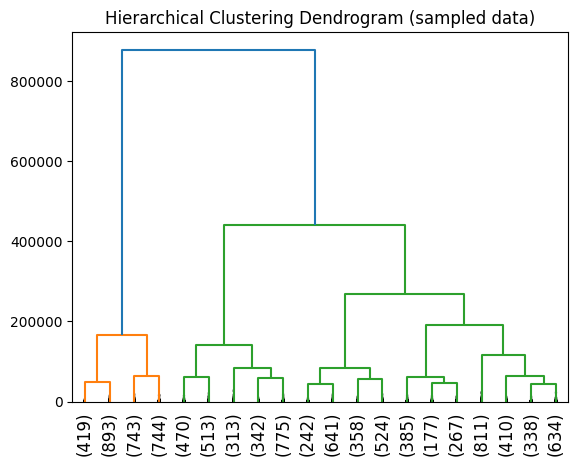

In [26]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'normalized_data_df' is your normalized dataset

# Define the sample size
sample_size = 10000  # Adjust this as needed, keeping in mind the computational complexity

# Randomly sample the data
sampled_indices = np.random.choice(normalized_data_df.index, size=sample_size, replace=False)
sampled_data = normalized_data_df.iloc[sampled_indices]

# Perform hierarchical clustering on the sample
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(sampled_data)

# Plot the dendrogram
plt.title('Hierarchical Clustering Dendrogram (sampled data)')
# Create linkage matrix
Z = sch.linkage(model.children_, method='ward')
sch.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# You can use the dendrogram to decide the number of clusters


In [36]:
from sklearn.neighbors import BallTree
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Normalize the testing playlist features
normalized_playlist_features = scaler.transform(playlist_features_df[features])

# Cluster the testing playlist into two clusters
playlist_kmeans = MiniBatchKMeans(n_clusters=2, random_state=0)
playlist_cluster_labels = playlist_kmeans.fit_predict(normalized_playlist_features)

# Create two Ball Trees for the 100k dataset clusters
tree_cluster_1 = BallTree(normalized_data_df[dataset_cluster_labels == 0])
tree_cluster_2 = BallTree(normalized_data_df[dataset_cluster_labels == 1])

# Function to find recommendations for each centroid
def find_recommendations_for_centroid(tree, centroid, songs_df, num_recommendations=3):
    distances, indices = tree.query([centroid], k=num_recommendations)
    return songs_df.iloc[indices[0]]

# Get recommendations for each cluster of the testing playlist
for i in range(2):
    # Calculate the centroid of the current testing playlist cluster
    current_playlist_centroid = normalized_playlist_features[playlist_cluster_labels == i].mean(axis=0)
    
    # Get the corresponding tree for the 100k dataset cluster
    current_tree = tree_cluster_1 if i == 0 else tree_cluster_2
    
    # Songs dataframe for the 100k dataset cluster
    songs_df = dataset_cluster_1_df if i == 0 else dataset_cluster_2_df
    
    # Find recommendations
    recommendations = find_recommendations_for_centroid(current_tree, current_playlist_centroid, songs_df)
    
    # Print recommendations
    print(f"Recommendations for Cluster {i+1}:")
    for index, song in recommendations.iterrows():
        print(f"- {song['track_name']} by {song['artist_name']}")
    print()


C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Recommendations for Cluster 1:
- Next Of Kin by Conor Oberst
- Climax by Usher
- 原來 by JJ Lin

Recommendations for Cluster 2:
- Circuital by My Morning Jacket
- Dawn Chorus by Beth Orton
- (Remember Me) I'm the One Who Loves You by Dean Martin

